In [1]:
%load_ext autoreload

import torch
from torch.nn import ReLU
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from torch.nn import ReLU

%matplotlib inline

mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2

mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2

ReLu = ReLU()

In [2]:
%autoreload
from srnn_helpers import *

In [3]:
targets = np.ones([2,20])
targets[0,:] = 0.015
targets[1,:] = 0.01

example_SparseRNN = SRNN(
    computing_mode='CPU',               # "CPU" or "GPU" modes
    N=100,                            # number of neurons in the SRNN
    connections_denseness=0.05,        # percentage of existing connections, among the possible N^2
    alpha=0.5,                        # P / (denseness * N^2) -> overwritten if P is provided
    targets=targets,                      # readout activity targets
    P=None,                       # number of patterns to store
    readout_requires_grad=False,  # choose whether readout weights are trained or not
    learning_rate=0.15,           # learning rate for the autograd optimizer
    firing_rate_function=(lambda x: tanh_shifted_and_scaled2one(x, -0.5)),  # non-linearity of the network dynamics
    loss_function=loss_ReLU_on_targets,  # loss function that BPTT uses
    E_to_I_neurons_ratio=1,    # ratio between number of E neurons and I neurons in the recurrent network
    initialization_type_for_J='random',  # initialization type for recurrent connections: "random" or "covariance"
    N_epochs=100,                 # number of training epochs
    dt=0.1,                       # time constant of the dynamics
    ON_time=10,                   # how many time steps "dt" the input stays ON
    total_time_multiple=5,        # factor that multiplies total training time so that testing is extended over longer times
    store_history=["accuracy_history" ], # store history of given variable names: 
                                            # "losses"                              : Ne
                                            # "readout_sparsity"                    : Ne
                                            # "accuracy_history"                    : Ne x Nt
                                            # "accuracy_history_proj_W_out"         : Ne x Nt
                                            # "J_history"                           : Ne x N  x N
                                            # "W_out_history"                       : Ne x 1  x N
                                            # "W_out_actual_history"                : Ne x 1  x N
                                            # "rates_all_history"                   : Ne x Nt x P x N
                                            # "readout_activity_history"            : Ne x Nt x P
                                            # "readout_activity_history_proj_W_out" : Ne x Nt x P
                                            # "thresholds_history"                  : Ne x Nt
                                            # "thresholds_history_proj_W_out"       : Ne x Nt
)

In [4]:
example_SparseRNN.train()

EPOCH 0. Running dynamics .........|.........|.....Performing BP; Current accuracy: 57.6%.
Epoch 0 time: 4.60s, Dynamics time: 0.49s, BP time: 4.11s.

EPOCH 1. Running dynamics .........|.........|.....Performing BP; Current accuracy: 57.6%.
Epoch 1 time: 4.71s, Dynamics time: 0.47s, BP time: 4.24s.

EPOCH 2. Running dynamics .........|.........|.....Performing BP; Current accuracy: 57.6%.
Epoch 2 time: 4.70s, Dynamics time: 0.44s, BP time: 4.25s.

EPOCH 3. Running dynamics .........|.........|.....Performing BP; Current accuracy: 59.2%.
Epoch 3 time: 4.76s, Dynamics time: 0.44s, BP time: 4.32s.

EPOCH 4. Running dynamics .........|.........|.....Performing BP; Current accuracy: 60.0%.
Epoch 4 time: 4.91s, Dynamics time: 0.44s, BP time: 4.47s.

EPOCH 5. Running dynamics .........|.........|.....Performing BP; Current accuracy: 61.6%.
Epoch 5 time: 4.98s, Dynamics time: 0.44s, BP time: 4.54s.

EPOCH 6. Running dynamics .........|.........|.....Performing BP; Current accuracy: 63.2%.
Epo

# Accuracy in time, post-training
The dashed lines mark the training region.

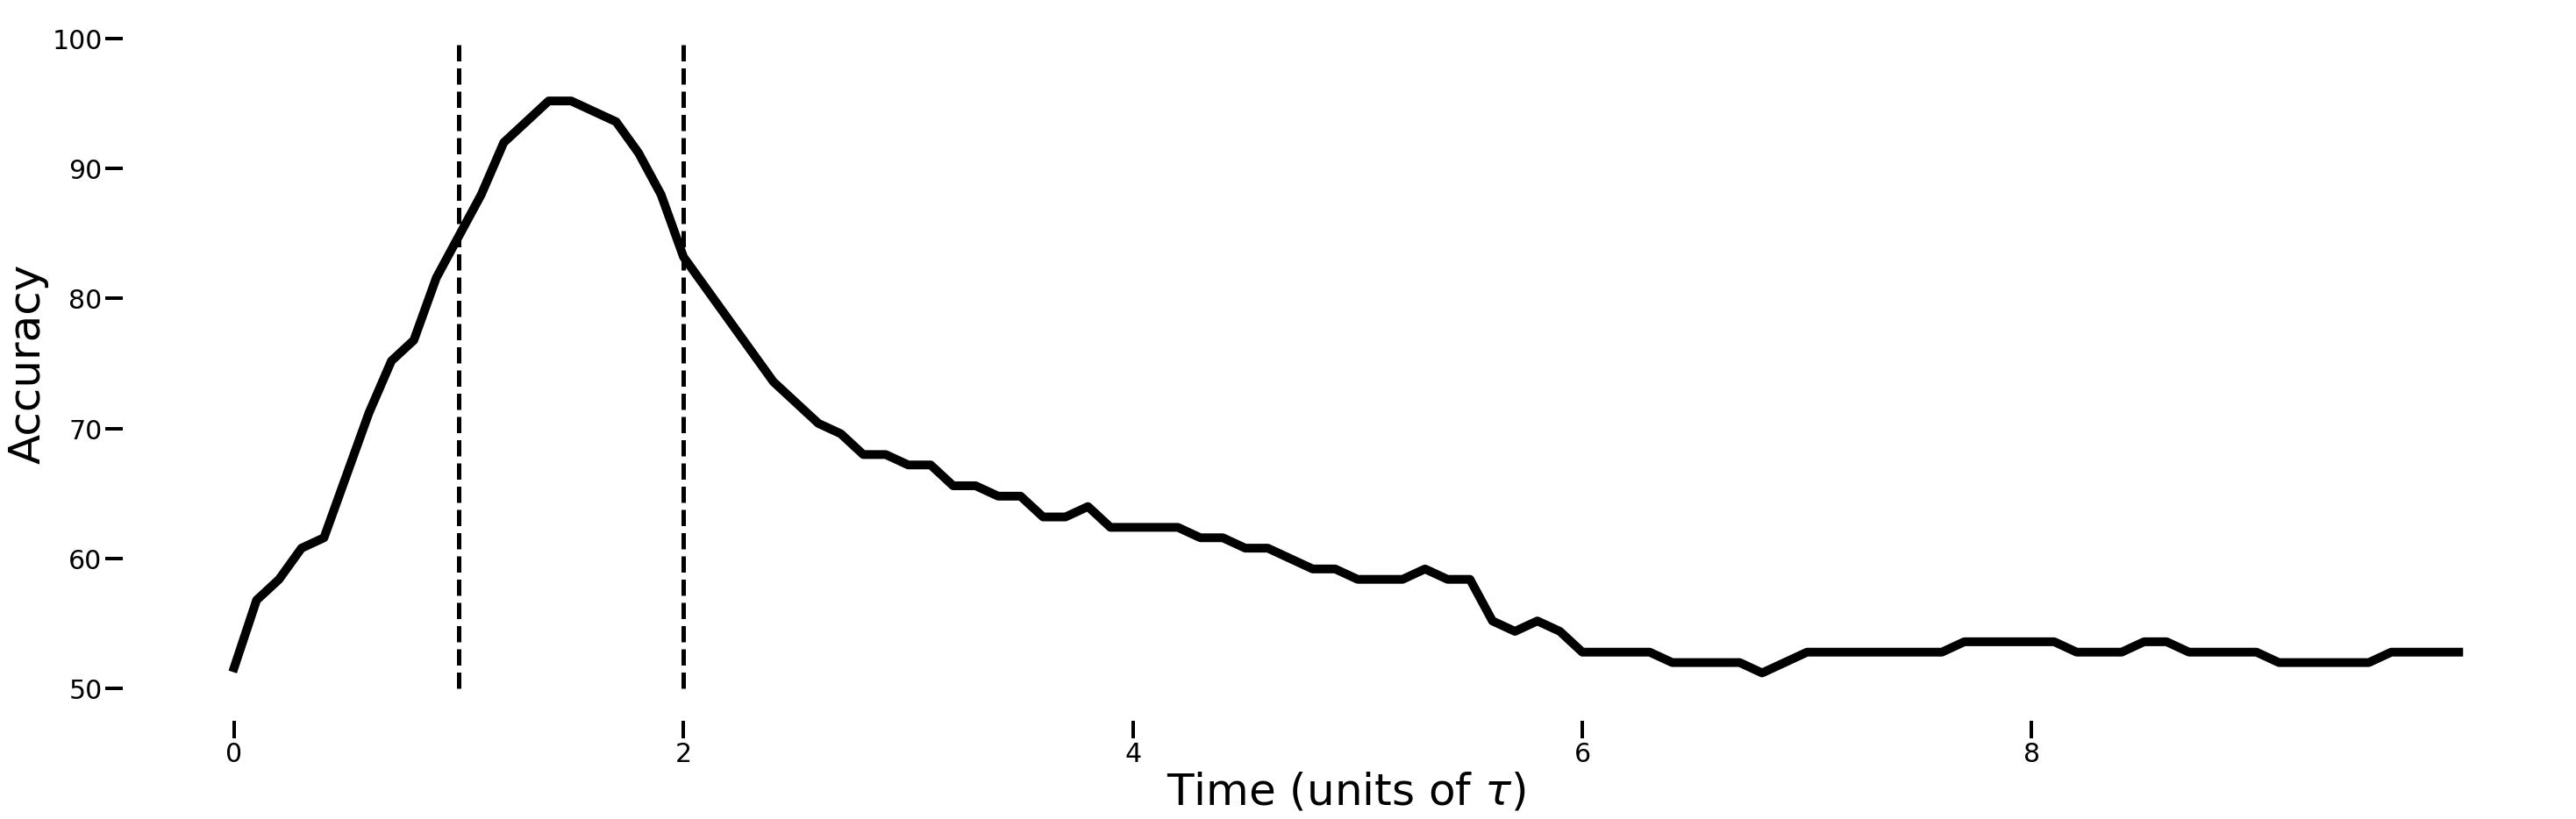

In [10]:
accuracy_in_time, _, _, _ = example_SparseRNN.prepare_for_tests(time_multiple=5)
plt.figure(figsize=(50,15))
plt.plot(accuracy_in_time, 'k', linewidth=10)

plt.xticks(np.arange(0,100,20), np.arange(0,10,2), fontsize=30)
plt.yticks(np.arange(50,101,10), fontsize=30)
plt.xlabel(r'Time (units of $\tau$)', fontsize=50)
plt.ylabel('Accuracy', fontsize=50)
plt.plot([10,10,],[50, 100],'k--', linewidth=5)
plt.plot([20,20,],[50, 100],'k--', linewidth=5)
plt.box(False)
plt.show()